## Housing Prices Competition for Kaggle by Richeng Piao

The problem is to predict housing prices (houses) based on their characteristics. This is a regression problem because we try to predict a continuous value instead of a binary value.

# Contents
1. [Importing Packages](#p1)
2. [Loading Data](#p2)
3. [Inspecting Data: Target Variable and its correlation](#p3)
4. [Imputing Null Values](#p4)
5. [Feature Engineering](#p5)
6. [ML Models](#p6)
7. [Model Comparison](#p7)
8. [Parameter tuning for Gradient Boosting](#p8)
9. [Blending + Submission](#p9)

<a id="p1"></a>
# 1.  Importing Packages
We will need as usual the numpy and pandas libraries to work with numbers and data, seaborn and matplotlib to visualize data. We would also like to filter out unnecessary warnings.

In [46]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

<a id="p2"></a>
# 2. Loading and Inspecting Data
We will try to load our Training and Test data set with some Pandas functions as well as inspect it in order to get an idea of the data we're working with. It is necessary to understand the data features before to start running any model.

In [47]:
#Data_train
df_train = pd.read_csv('data/train.csv')
#Data_test
df_test = pd.read_csv('data/test.csv')

#Data (Train + Test)
data = pd.concat((df_train, df_test)).reset_index(drop=True)
data.drop(['SalePrice'], axis=1, inplace=True)

df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [48]:
df_train.shape, df_test.shape

((1460, 81), (1459, 80))

The Training data contains 1460 rows and 81 columns (features), testing data has 80 columns.

In [49]:
df_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [50]:
df_train.keys()

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [51]:
#Different types of the features
df_train.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
                  ...   
BedroomAbvGr       int64
KitchenAbvGr       int64
KitchenQual       object
TotRmsAbvGrd       int64
Functional        object
Fireplaces         int64
FireplaceQu       object
GarageType        object
GarageYrBlt      float64


<a id="p3"></a>
# 3. Inspecting Data: Target Variable and its Correlation


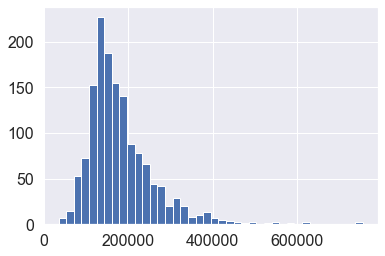

In [52]:
#histogram
df_train['SalePrice'].hist(bins = 40)

We can clearly see that the target variable has a normal ditribution that is skewed towards the left. Now let's calculate the Skewness and Kurtosis :

In [53]:
#skewness & kurtosis
print("Skewness: %f" % df_train['SalePrice'].skew())
print("Kurtosis: %f" % df_train['SalePrice'].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


As we've seen before, there are so many columns to work with, so let's try to figure out the correlations to get a better idea of which columns are strongly related to the Sale Price of the house. This will help us eliminating the features that won't do a good job predicting the Sale Price.

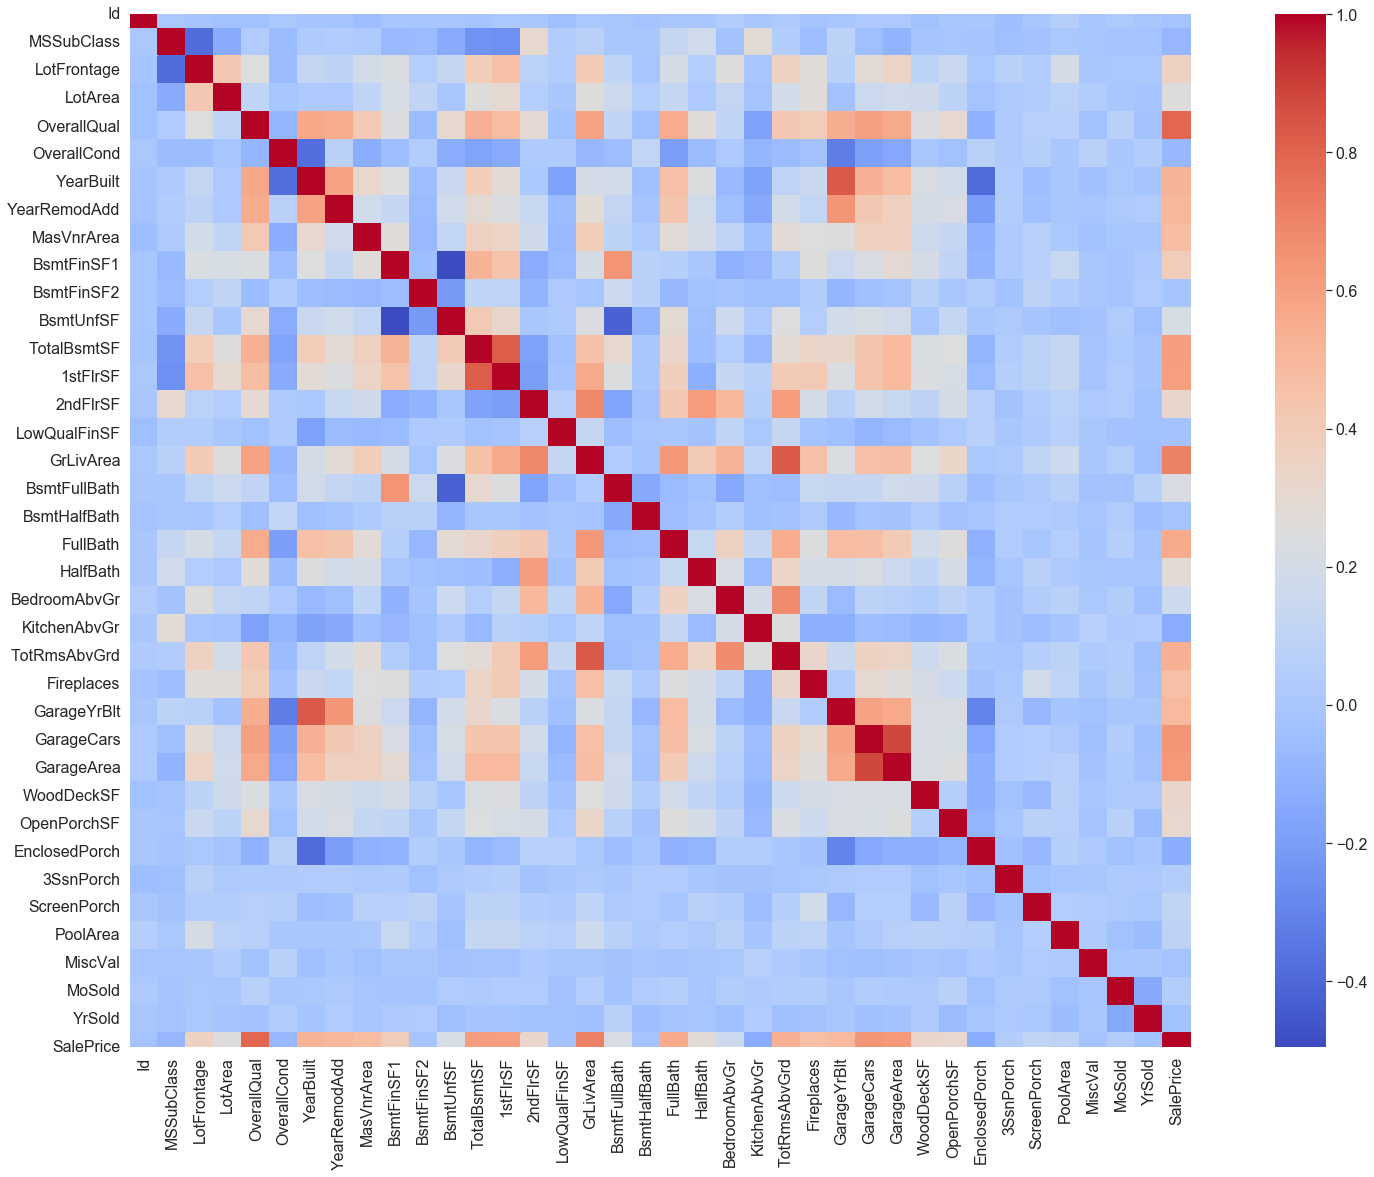

In [54]:
#correlation matrix
corrmat = df_train.corr()

#Plot a heatmap to visualize the correlations
f, ax = plt.subplots(figsize=(30, 19))
sns.set(font_scale=1.45)
sns.heatmap(corrmat, square=True,cmap='coolwarm');

In [55]:
correlations = corrmat["SalePrice"].sort_values(ascending=False)
features = correlations.index[0:10]
features

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt'],
      dtype='object')

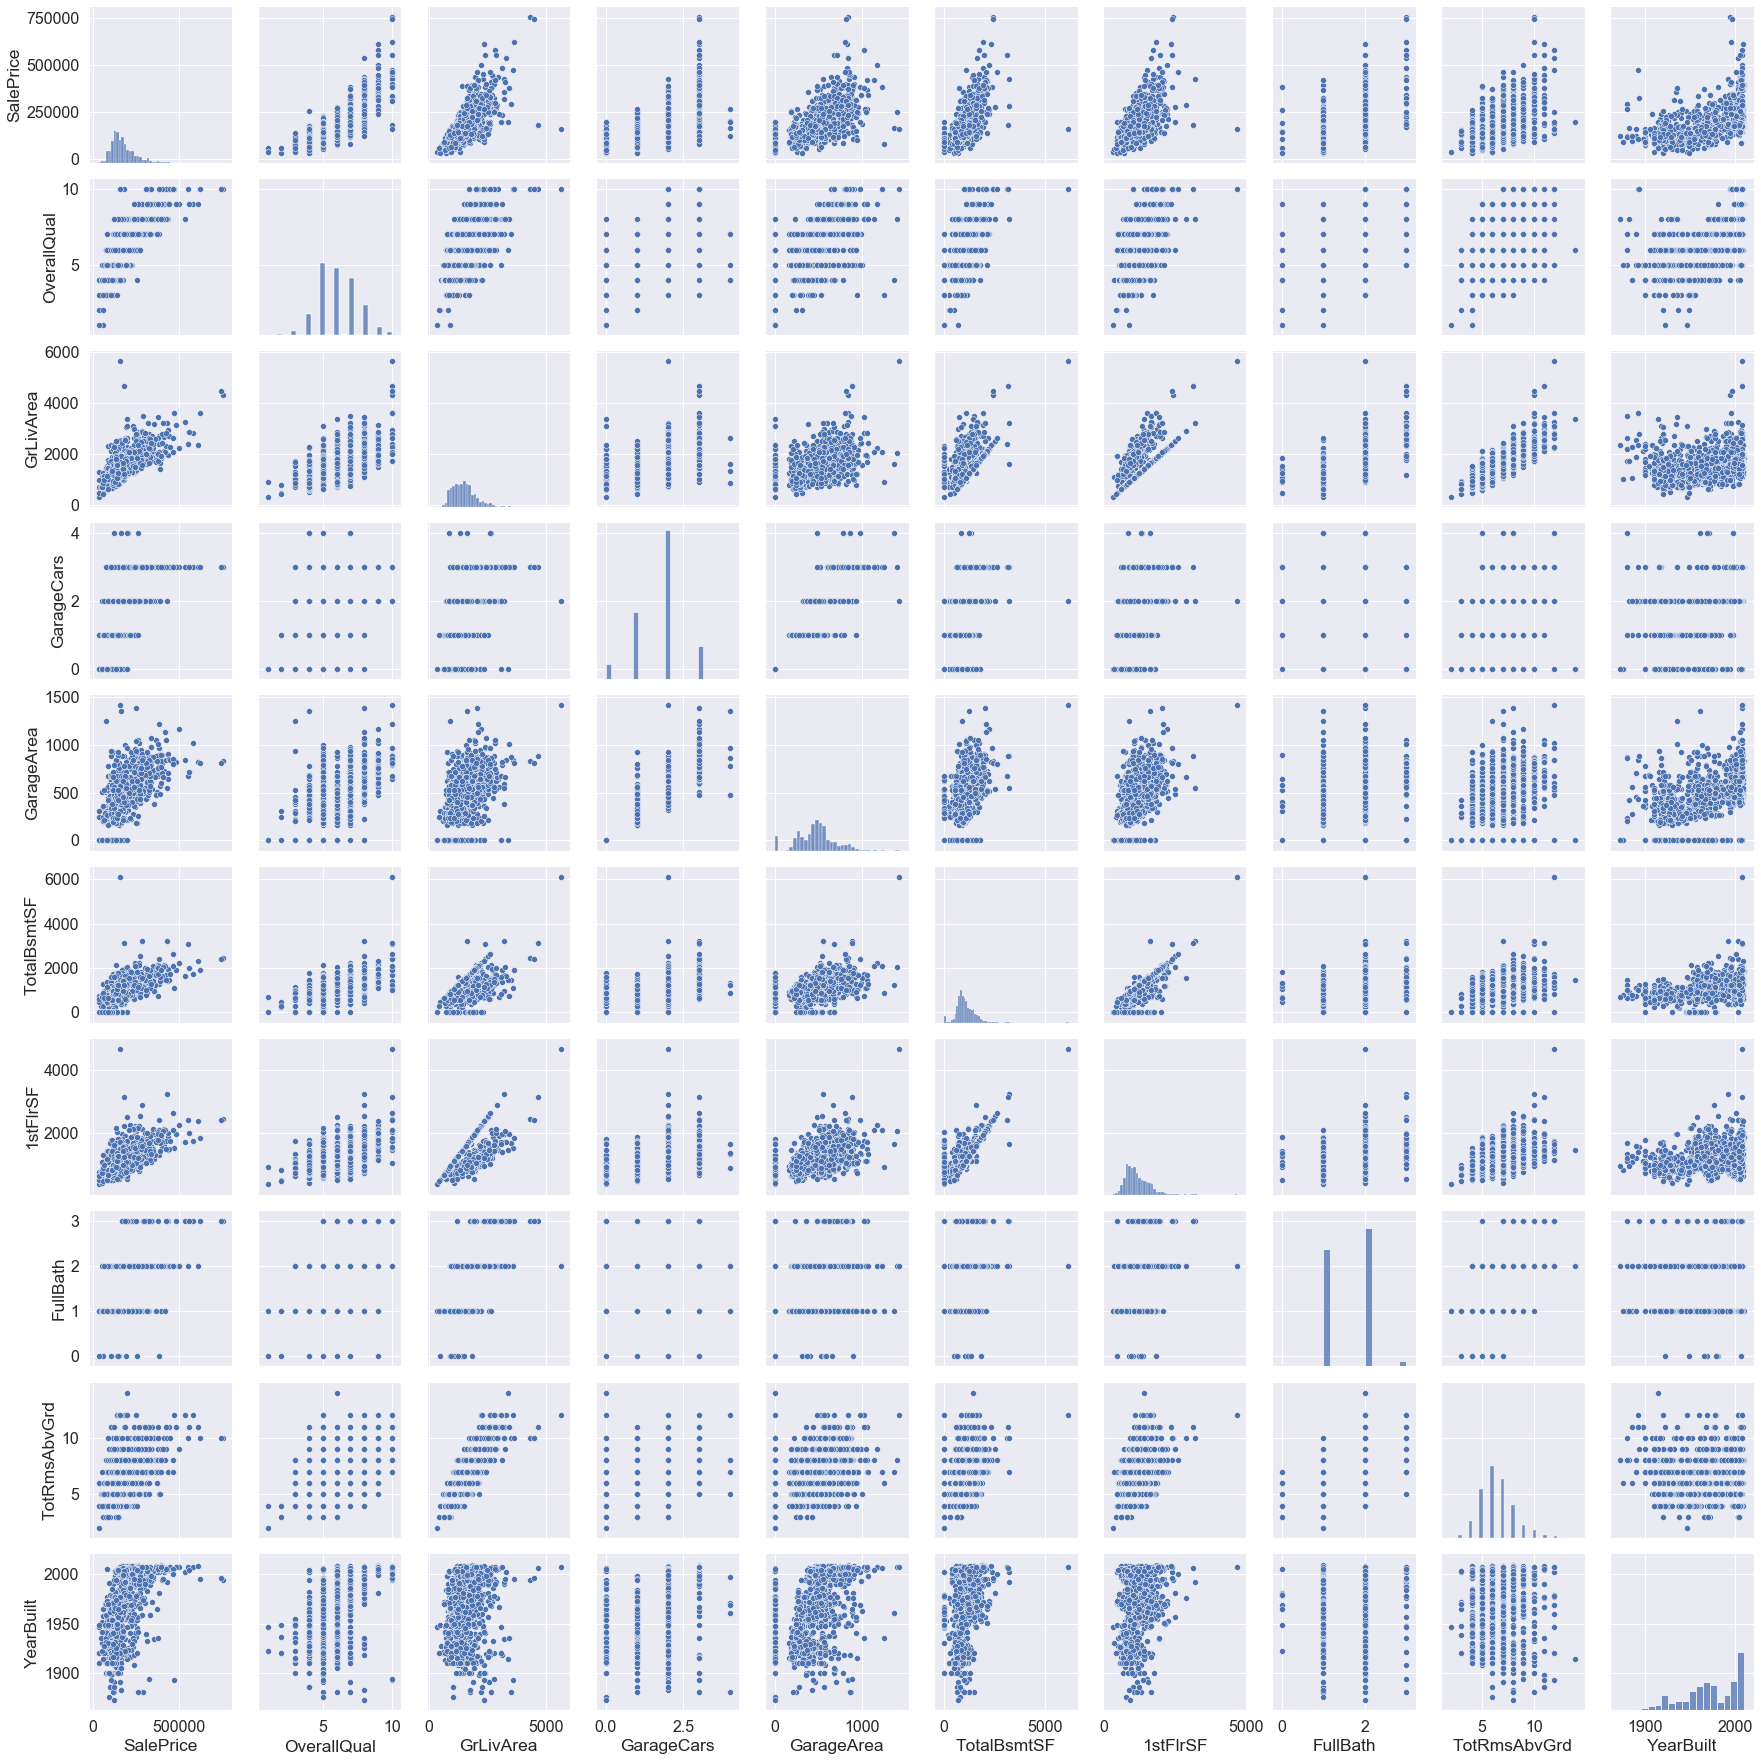

In [56]:
sns.pairplot(df_train[features], size = 2.5)
plt.show();

<a id="p4"></a>
# 4. Imputing Null Values


First of all, we will start with dropping the Id column , as it doesn't add any information for our model.

In [57]:
df_train.drop(['Id'], axis=1, inplace=True)
df_test.drop(['Id'], axis=1, inplace=True)
data.drop(['Id'], axis=1, inplace=True)

In this large data, we have a lot of missing values in the cells. In order to effectively train our model, we must first deal with the missing values. There are missing values for both numerical and categorical data.

For numerical imputing, we will try to fill the missing values with the mean. For categorical imputing, I chose to fill the missing values with the most common term that appeared from the entire column.

## NaN values are important
In fact, the NaN values actually mean something in some columns. This means that if a value is NaN, the house might not have that certain attribute, which will affect the price of the house.
So, we will try to fill in the null cell with a new category called "None".

In [58]:
training_null = pd.isnull(df_train).sum()
testing_null = pd.isnull(df_test).sum()

null = pd.concat([training_null, testing_null], axis=1, keys=["Training", "Testing"])

In [59]:
null

,Training,Testing
1stFlrSF,0,0.0
2ndFlrSF,0,0.0
3SsnPorch,0,0.0
Alley,1369,1352.0
BedroomAbvGr,0,0.0
BldgType,0,0.0
BsmtCond,37,45.0
BsmtExposure,38,44.0
BsmtFinSF1,0,1.0
BsmtFinSF2,0,1.0


In [60]:
#Based on the description data file provided, all the variables who have meaningfull Nan

null_with_meaning = ["Alley", "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2", "FireplaceQu", "GarageType", "GarageFinish", "GarageQual", "GarageCond", "PoolQC", "Fence", "MiscFeature"]

In [61]:
#Replacing every Nan value with "None"

for i in null_with_meaning:
    df_train[i].fillna("None", inplace=True)
    df_test[i].fillna("None", inplace=True)
    data[i].fillna("None", inplace=True)

## Imputing "Real" NaN Values
Now we are going to deal with the real NaN values that were not recorded.

In [62]:
null_many = null[null.sum(axis=1) > 200]  #a lot of missing values
null_few = null[(null.sum(axis=1) > 0) & (null.sum(axis=1) < 200)]  #few missing values
null_many

,Training,Testing
Alley,1369,1352.0
Fence,1179,1169.0
FireplaceQu,690,730.0
LotFrontage,259,227.0
MiscFeature,1406,1408.0
PoolQC,1453,1456.0


We can see that the feature LotFrontage has too many Null values, so it's better to just drop it.

In [63]:
df_train.drop("LotFrontage", axis=1, inplace=True)
df_test.drop("LotFrontage", axis=1, inplace=True)
data.drop("LotFrontage", axis=1, inplace=True)

In [64]:
null_few

,Training,Testing
BsmtCond,37,45.0
BsmtExposure,38,44.0
BsmtFinSF1,0,1.0
BsmtFinSF2,0,1.0
BsmtFinType1,37,42.0
BsmtFinType2,38,42.0
BsmtFullBath,0,2.0
BsmtHalfBath,0,2.0
BsmtQual,37,44.0
BsmtUnfSF,0,1.0


the features GarageYrBlt, MasVnrArea, and MasVnrType all have a fairly decent amount of missing values. MasVnrType is categorical so we can replace the missing values with "None", as we did before.
For the others we have many options : choosing between filling with the mean or the median, and these measures can be applied on the train, test or both at the same time.

In [65]:
#I chose to use the mean function for replacement
df_train["GarageYrBlt"].fillna(df_train["GarageYrBlt"].mean(), inplace=True)
df_test["GarageYrBlt"].fillna(df_test["GarageYrBlt"].mean(), inplace=True)
data["GarageYrBlt"].fillna(data["GarageYrBlt"].mean(), inplace=True)
df_train["MasVnrArea"].fillna(df_train["MasVnrArea"].mean(), inplace=True)
df_test["MasVnrArea"].fillna(df_test["MasVnrArea"].mean(), inplace=True)
data["MasVnrArea"].fillna(data["MasVnrArea"].mean(), inplace=True)

df_train["MasVnrType"].fillna("None", inplace=True)
df_test["MasVnrType"].fillna("None", inplace=True)
data["MasVnrType"].fillna("None", inplace=True)

Now, the features with a lot of missing values have been taken care of! Let's move on to the features with fewer missing values.

In [66]:
types_train = df_train.dtypes #type of each feature in data: int, float, object
num_train = types_train[(types_train == int) | (types_train == float)] #numerical values are either type int or float
cat_train = types_train[types_train == object] #categorical values are type object

#we do the same for the test set
types_test = df_test.dtypes
num_test = types_test[(types_test == int) | (types_test == float)]
cat_test = types_test[types_test == object]

**Numerical Imputing**

We'll impute with mean of the values, or we can use the median since the distributions are a little bit skewed as we saw before.

In [67]:
#we should convert num_train and num_test to a list to make it easier to work with
numerical_values_train = list(num_train.index)
numerical_values_test = list(num_test.index)
fill_num = numerical_values_train+numerical_values_test

print(fill_num)

['MasVnrArea', 'GarageYrBlt', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'GarageYrBlt', 'GarageCars', 'GarageArea']


In [68]:
for i in fill_num:
    df_train[i].fillna(df_train[i].mean(), inplace=True)
    df_test[i].fillna(df_test[i].mean(), inplace=True)
    data[i].fillna(data[i].mean(), inplace=True)

**Categorical Imputing**

We'll impute with the most common term that appears in the entire list.

In [69]:
df_train.shape, df_test.shape

((1460, 79), (1459, 78))

In [70]:
categorical_values_train = list(cat_train.index)
categorical_values_test = list(cat_test.index)

In [71]:
fill_cat = []

for i in categorical_values_train:
    if i in list(null_few.index):
        fill_cat.append(i)
print(fill_cat)

['MSZoning', 'Utilities', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'KitchenQual', 'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'SaleType']


In [72]:
def most_common_term(lst):
    lst = list(lst)
    return max(set(lst), key=lst.count)
#most_common_term finds the most common term in a series

most_common = []

for i in fill_cat:
    most_common.append(most_common_term(data[i]))
    
most_common

['RL',
 'AllPub',
 'VinylSd',
 'VinylSd',
 'None',
 'TA',
 'TA',
 'No',
 'Unf',
 'Unf',
 'SBrkr',
 'TA',
 'Typ',
 'Attchd',
 'Unf',
 'TA',
 'TA',
 'WD']

To show the most common term for each of the categorical features that we're working with. We'll replace the null values with these.

In [73]:
most_common_dictionary = {fill_cat[0]: [most_common[0]], fill_cat[1]: [most_common[1]], fill_cat[2]: [most_common[2]], fill_cat[3]: [most_common[3]],
                          fill_cat[4]: [most_common[4]], fill_cat[5]: [most_common[5]], fill_cat[6]: [most_common[6]], fill_cat[7]: [most_common[7]],
                          fill_cat[8]: [most_common[8]]}
most_common_dictionary

{'MSZoning': ['RL'],
 'Utilities': ['AllPub'],
 'Exterior1st': ['VinylSd'],
 'Exterior2nd': ['VinylSd'],
 'MasVnrType': ['None'],
 'BsmtQual': ['TA'],
 'BsmtCond': ['TA'],
 'BsmtExposure': ['No'],
 'BsmtFinType1': ['Unf']}

In [74]:
k = 0
for i in fill_cat:  
    df_train[i].fillna(most_common[k], inplace=True)
    df_test[i].fillna(most_common[k], inplace=True)
    data[i].fillna(most_common[k], inplace=True)
    k += 1

Let's check how many null values are remaining.

In [75]:
training_null = pd.isnull(df_train).sum()
testing_null = pd.isnull(df_test).sum()

null = pd.concat([training_null, testing_null], axis=1, keys=["Training", "Testing"])
null[null.sum(axis=1) > 0]

,Training,Testing


If it works successful, the code above should print an empty table.

<a id="p5"></a>
# 5. Feature Engineering

As we saw before, the target variable "SalePrice" is not uniformly distributed and it's skewed towards the left . Therefore, we will try to use log to remove the skewness.

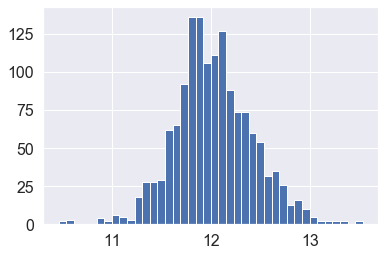

In [76]:
(np.log(df_train["SalePrice"])).hist(bins = 40)

It appears that adding the logarithm has made the target SalePrice more normally distributed. Machine Learning models tend to work much better with normally distributed targets, rather than greatly skewed targets. By transforming the prices, we can improve the performance later.

In [77]:
df_train["LogPrice"] = np.log(df_train["SalePrice"])
df_train.head()

,MSSubClass,MSZoning,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LogPrice
0,60,RL,8450,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,...,None,None,None,0,2,2008,WD,Normal,208500,12.247694
1,20,RL,9600,Pave,None,Reg,Lvl,AllPub,FR2,Gtl,...,None,None,None,0,5,2007,WD,Normal,181500,12.109011
2,60,RL,11250,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,...,None,None,None,0,9,2008,WD,Normal,223500,12.317167
3,70,RL,9550,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,...,None,None,None,0,2,2006,WD,Abnorml,140000,11.849398
4,60,RL,14260,Pave,None,IR1,Lvl,AllPub,FR2,Gtl,...,None,None,None,0,12,2008,WD,Normal,250000,12.429216


### Adding new features: 

In [78]:
df_train_add = df_train.copy()

df_train_add['TotalSF']=df_train_add['TotalBsmtSF'] + df_train_add['1stFlrSF'] + df_train_add['2ndFlrSF']

df_train_add['Total_Bathrooms'] = (df_train_add['FullBath'] + (0.5 * df_train_add['HalfBath']) +
                               df_train_add['BsmtFullBath'] + (0.5 * df_train_add['BsmtHalfBath']))

df_train_add['Total_porch_sf'] = (df_train_add['OpenPorchSF'] + df_train_add['3SsnPorch'] +
                              df_train_add['EnclosedPorch'] + df_train_add['ScreenPorch'] +
                              df_train_add['WoodDeckSF'])

df_test_add = df_test.copy()

df_test_add['TotalSF']=df_test_add['TotalBsmtSF'] + df_test_add['1stFlrSF'] + df_test_add['2ndFlrSF']

df_test_add['Total_Bathrooms'] = (df_test_add['FullBath'] + (0.5 * df_test_add['HalfBath']) +
                               df_test_add['BsmtFullBath'] + (0.5 * df_test_add['BsmtHalfBath']))

df_test_add['Total_porch_sf'] = (df_test_add['OpenPorchSF'] + df_test_add['3SsnPorch'] +
                              df_test_add['EnclosedPorch'] + df_test_add['ScreenPorch'] +
                              df_test_add['WoodDeckSF'])

In [79]:
## For ex, if PoolArea = 0 , Then HasPool = 0 too

df_train_add['haspool'] = df_train_add['PoolArea'].apply(lambda x: 1 if x > 0 else 0)
df_train_add['has2ndfloor'] = df_train_add['2ndFlrSF'].apply(lambda x: 1 if x > 0 else 0)
df_train_add['hasgarage'] = df_train_add['GarageArea'].apply(lambda x: 1 if x > 0 else 0)
df_train_add['hasbsmt'] = df_train_add['TotalBsmtSF'].apply(lambda x: 1 if x > 0 else 0)
df_train_add['hasfireplace'] = df_train_add['Fireplaces'].apply(lambda x: 1 if x > 0 else 0)

df_test_add['haspool'] = df_test_add['PoolArea'].apply(lambda x: 1 if x > 0 else 0)
df_test_add['has2ndfloor'] = df_test_add['2ndFlrSF'].apply(lambda x: 1 if x > 0 else 0)
df_test_add['hasgarage'] = df_test_add['GarageArea'].apply(lambda x: 1 if x > 0 else 0)
df_test_add['hasbsmt'] = df_test_add['TotalBsmtSF'].apply(lambda x: 1 if x > 0 else 0)
df_test_add['hasfireplace'] = df_test_add['Fireplaces'].apply(lambda x: 1 if x > 0 else 0)

In [80]:
df_train[df_train["SalePrice"] > 600000 ] #Discovering the outliers

,MSSubClass,MSZoning,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LogPrice
691,60,RL,21535,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,...,None,None,None,0,1,2007,WD,Normal,755000,13.534473
898,20,RL,12919,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,...,None,None,None,0,3,2010,New,Partial,611657,13.323927
1169,60,RL,35760,Pave,None,IR1,Lvl,AllPub,CulDSac,Gtl,...,None,None,None,0,7,2006,WD,Normal,625000,13.345507
1182,60,RL,15623,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,...,Ex,MnPrv,None,0,7,2007,WD,Abnorml,745000,13.521139


In [81]:
categorical_values_train = list(cat_train.index)
categorical_values_test = list(cat_test.index)
print(categorical_values_train)

['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


In [82]:
for i in categorical_values_train:
    feature_set = set(df_train[i])
    for j in feature_set:
        feature_list = list(feature_set)
        df_train.loc[df_train[i] == j, i] = feature_list.index(j)
        df_train_add.loc[df_train[i] == j, i] = feature_list.index(j)

for i in categorical_values_test:
    feature_set2 = set(df_test[i])
    for j in feature_set2:
        feature_list2 = list(feature_set2)
        df_test.loc[df_test[i] == j, i] = feature_list2.index(j)
        df_test_add.loc[df_test[i] == j, i] = feature_list2.index(j)

In [83]:
df_train_add.head()

,MSSubClass,MSZoning,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,SalePrice,LogPrice,TotalSF,Total_Bathrooms,Total_porch_sf,haspool,has2ndfloor,hasgarage,hasbsmt,hasfireplace
0,60,RL,8450,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,...,208500,12.247694,2566,3.5,61,0,1,1,1,0
1,20,RL,9600,Pave,None,Reg,Lvl,AllPub,FR2,Gtl,...,181500,12.109011,2524,2.5,298,0,0,1,1,1
2,60,RL,11250,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,...,223500,12.317167,2706,3.5,42,0,1,1,1,1
3,70,RL,9550,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,...,140000,11.849398,2473,2.0,307,0,1,1,1,1
4,60,RL,14260,Pave,None,IR1,Lvl,AllPub,FR2,Gtl,...,250000,12.429216,3343,3.5,276,0,1,1,1,1


In [84]:
df_test_add.head()

,MSSubClass,MSZoning,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,SaleType,SaleCondition,TotalSF,Total_Bathrooms,Total_porch_sf,haspool,has2ndfloor,hasgarage,hasbsmt,hasfireplace
0,20,RH,11622,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,...,WD,Normal,1778.0,1.0,260,0,0,1,1,0
1,20,RL,14267,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,...,WD,Normal,2658.0,1.5,429,0,0,1,1,0
2,60,RL,13830,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,...,WD,Normal,2557.0,2.5,246,0,1,1,1,1
3,60,RL,9978,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,...,WD,Normal,2530.0,2.5,396,0,1,1,1,1
4,120,RL,5005,Pave,None,IR1,HLS,AllPub,Inside,Gtl,...,WD,Normal,2560.0,2.0,226,0,0,1,1,0


<a id="p6"></a>
# 6. Process : ML Models
Now that we've explored the data, we can begin to build and test different models for regression to predict the SalePrice of each house.
In classification, we used accuracy as a evaluation metric. In regression, we will use the R^2 score as well as the RMSE to evaluate our model performance. We will also use cross validation to optimize our model hyperparameters.

In [85]:
#Importing all the librairies we'll need

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score, KFold

### Defining Training/Test Sets

We have already dropped the Id column for the training set since those are not involved in predicting the Sale Price of a house. We will also drop The SalePrice column from our training dataset and make LogPrice our target instead. This will improve model performance and yield a much smaller RMSE because of the scale.

In [86]:
X_train = df_train_add.drop(["SalePrice","LogPrice"], axis=1)
y_train = df_train_add["LogPrice"]

### Splitting into Validation

Try to split our training data again into validation sets. This will help us evaluate our model performance and maybe avoid overfitting.

In [87]:
from sklearn.model_selection import train_test_split #to create validation data set

X_training, X_valid, y_training, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=0) #X_valid and y_valid are the validation sets

## Linear Regression Model

In [101]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_training,y_training)
print(lm)

ValueError: could not convert string to float: 'RL'

**Model Evaluation**
Let's evaluate the model by checking out it's coefficients and how we can interpret them.

In [92]:
# print the intercept
print(lm.intercept_)

AttributeError: 'LinearRegression' object has no attribute 'intercept_'

In [93]:
print(lm.coef_)

AttributeError: 'LinearRegression' object has no attribute 'coef_'

**Predictions from our Model** 

In [94]:
predictions = lm.predict(X_valid)
predictions= predictions.reshape(-1,1)

NotFittedError: This LinearRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [95]:
submission_predictions = np.exp(predictions)

NameError: name 'predictions' is not defined

In [96]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_valid, submission_predictions))
print('MSE:', metrics.mean_squared_error(y_valid, submission_predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_valid, submission_predictions)))

NameError: name 'submission_predictions' is not defined

**Adding the GridSearchCV function**

In [97]:
linreg = LinearRegression()
parameters_lin = {"fit_intercept" : [True, False], "normalize" : [True, False], "copy_X" : [True, False]}
grid_linreg = GridSearchCV(linreg, parameters_lin, verbose=1 , scoring = "r2")
grid_linreg.fit(X_training, y_training)

print("Best LinReg Model: " + str(grid_linreg.best_estimator_))
print("Best Score: " + str(grid_linreg.best_score_))

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    0.1s finished


ValueError: could not convert string to float: 'RL'

In [98]:
linreg = grid_linreg.best_estimator_
linreg.fit(X_training, y_training)
lin_pred = linreg.predict(X_valid)
r2_lin = r2_score(y_valid, lin_pred)
rmse_lin = np.sqrt(mean_squared_error(y_valid, lin_pred))
print("R^2 Score: " + str(r2_lin))
print("RMSE Score: " + str(rmse_lin))

ValueError: could not convert string to float: 'RL'

In [99]:
scores_lin = cross_val_score(linreg, X_training, y_training, cv=10, scoring="r2")
print("Cross Validation Score: " + str(np.mean(scores_lin)))

Cross Validation Score: nan


## Ridge Model

In [100]:
ridge = Ridge()
parameters_ridge = {"fit_intercept" : [True, False], "normalize" : [True, False], "copy_X" : [True, False], "solver" : ["auto"]}
grid_ridge = GridSearchCV(ridge, parameters_ridge, verbose=1, scoring="r2")
grid_ridge.fit(X_training, y_training)

print("Best Ridge Model: " + str(grid_ridge.best_estimator_))
print("Best Score: " + str(grid_ridge.best_score_))

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    0.1s finished


ValueError: could not convert string to float: 'RL'

In [ ]:
ridge = grid_ridge.best_estimator_
ridge.fit(X_training, y_training)
ridge_pred = ridge.predict(X_valid)
r2_ridge = r2_score(y_valid, ridge_pred)
rmse_ridge = np.sqrt(mean_squared_error(y_valid, ridge_pred))
print("R^2 Score: " + str(r2_ridge))
print("RMSE Score: " + str(rmse_ridge))

R^2 Score: 0.7111632617026978
RMSE Score: 0.20911680111612638


In [ ]:
scores_ridge = cross_val_score(ridge, X_training, y_training, cv=10, scoring="r2")
print("Cross Validation Score: " + str(np.mean(scores_ridge)))

Cross Validation Score: 0.8826483975606066


## Gradient Boosting Regression

In [ ]:
from sklearn import ensemble

In [ ]:
params = {'n_estimators': 20000, 'max_depth': 5, 'min_samples_split': 2,
          'learning_rate': 0.05, 'loss': 'ls' , 'max_features' : 20}
clf = ensemble.GradientBoostingRegressor(**params)

clf.fit(X_training, y_training)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.05, loss='ls', max_depth=5, max_features=20,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=20000, n_iter_no_change=None, presort='auto',
             random_state=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [ ]:
clf_pred=clf.predict(X_valid)
clf_pred= clf_pred.reshape(-1,1)
r2_clf = r2_score(y_valid, clf_pred)
rmse_clf = np.sqrt(mean_squared_error(y_valid, clf_pred))
print("R^2 Score: " + str(r2_clf))
print("RMSE Score: " + str(rmse_clf))

R^2 Score: 0.9026434177039313
RMSE Score: 0.12140745926908018


In [ ]:
scores_clf = cross_val_score(clf, X_training, y_training, cv=10, scoring="r2")
print("Cross Validation Score: " + str(np.mean(scores_clf)))

Cross Validation Score: 0.9052452435126577


## Decision Tree Regression

In [ ]:
from sklearn.tree import DecisionTreeRegressor
dtreg = DecisionTreeRegressor(random_state = 100)
parameters_dtr = {"criterion" : ["mse", "friedman_mse", "mae"], "splitter" : ["best", "random"], "min_samples_split" : [2, 3, 5, 10], 
                  "max_features" : ["auto", "log2"]}
grid_dtr = GridSearchCV(dtreg, parameters_dtr, verbose=1, scoring="r2")
grid_dtr.fit(X_training, y_training)

print("Best DecisionTreeRegressor Model: " + str(grid_dtr.best_estimator_))
print("Best Score: " + str(grid_dtr.best_score_))

Fitting 3 folds for each of 48 candidates, totalling 144 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Best DecisionTreeRegressor Model: DecisionTreeRegressor(criterion='friedman_mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=10,
           min_weight_fraction_leaf=0.0, presort=False, random_state=100,
           splitter='best')
Best Score: 0.7626997277193123


[Parallel(n_jobs=1)]: Done 144 out of 144 | elapsed:    4.3s finished


In [ ]:
dtr = grid_dtr.best_estimator_
dtreg.fit(X_training, y_training)
dtr_pred = dtreg.predict(X_valid)
r2_dtr = r2_score(y_valid, dtr_pred)
rmse_dtr = np.sqrt(mean_squared_error(y_valid, dtr_pred))
print("R^2 Score: " + str(r2_dtr))
print("RMSE Score: " + str(rmse_dtr))

R^2 Score: 0.658845038323427
RMSE Score: 0.22726813955416783


In [ ]:
scores_dtr = cross_val_score(dtreg, X_training, y_training, cv=10, scoring="r2")
print("Cross Validation Score: " + str(np.mean(scores_dtr)))

Cross Validation Score: 0.7391534101060576


## Random Forest Regression 

In [ ]:
rfr = RandomForestRegressor()
paremeters_rf = {"n_estimators" : [5, 10, 15, 20], "criterion" : ["mse" , "mae"], "min_samples_split" : [2, 3, 5, 10], 
                 "max_features" : ["auto", "log2"]}
grid_rf = GridSearchCV(rfr, paremeters_rf, verbose=1, scoring="r2")
grid_rf.fit(X_training, y_training)

print("Best RandomForestRegressor Model: " + str(grid_rf.best_estimator_))
print("Best Score: " + str(grid_rf.best_score_))

Fitting 3 folds for each of 64 candidates, totalling 192 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 192 out of 192 | elapsed:  1.0min finished


Best RandomForestRegressor Model: RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=3,
           min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)
Best Score: 0.873165945050712


In [ ]:
rf = grid_rf.best_estimator_
rfr.fit(X_training, y_training)
rf_pred = rfr.predict(X_valid)
r2_rf = r2_score(y_valid, rf_pred)
rmse_rf = np.sqrt(mean_squared_error(y_valid, rf_pred))
print("R^2 Score: " + str(r2_rf))
print("RMSE Score: " + str(rmse_rf))

R^2 Score: 0.8589823683815117
RMSE Score: 0.14611655323801886


In [ ]:
scores_rf = cross_val_score(rfr, X_training, y_training, cv=10, scoring="r2")
print("Cross Validation Score: " + str(np.mean(scores_rf)))

Cross Validation Score: 0.8615485855857704


## Xgboost

In [ ]:
from xgboost import XGBRegressor

xgboost = XGBRegressor(learning_rate=0.01,n_estimators=20000,
                                     max_depth=3, min_child_weight=0,
                                     gamma=0, subsample=0.7,
                                     colsample_bytree=0.7,
                                     objective='reg:linear', nthread=-1,
                                     scale_pos_weight=1, seed=27,
                                     reg_alpha=0.006)
xgb = xgboost.fit(X_training, y_training)

[11:45:10] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
xgb_pred = xgb.predict(X_valid)
r2_xgb = r2_score(y_valid, xgb_pred)
rmse_xgb = np.sqrt(mean_squared_error(y_valid, xgb_pred))
print("R^2 Score: " + str(r2_xgb))
print("RMSE Score: " + str(rmse_xgb))

R^2 Score: 0.9041775971819223
RMSE Score: 0.1204470698513707


### LGBM Regressor

In [ ]:
from lightgbm import LGBMRegressor

lightgbm = LGBMRegressor(objective='regression', 
                                       num_leaves=4,
                                       learning_rate=0.01, 
                                       n_estimators=20000,
                                       max_bin=2000, 
                                       bagging_fraction=0.75,
                                       bagging_freq=5, 
                                       bagging_seed=7,
                                       feature_fraction=0.2,
                                       feature_fraction_seed=7,
                                       verbose=-1,
                                       )
gbm = lightgbm.fit(X_training, y_training)

In [ ]:
gbm_pred = gbm.predict(X_valid)
r2_gbm = r2_score(y_valid, gbm_pred)
rmse_gbm = np.sqrt(mean_squared_error(y_valid, gbm_pred))
print("R^2 Score: " + str(r2_gbm))
print("RMSE Score: " + str(rmse_gbm))

R^2 Score: 0.8889964764023188
RMSE Score: 0.12963763312195736


<a id="p7"></a>
# 7. Model Comparison
After applying different models and evaluating them, now we will use test data to predict the LogPrice with the most adequat one.

In [ ]:
model_performances = pd.DataFrame({
    "Model" : ["Linear Regression", "Ridge", "Decision Tree Regressor", "Random Forest Regressor","Gradient Boosting Regression","XGBoost","LGBM Regressor"],
    "R Squared" : [str(r2_lin)[0:5], str(r2_ridge)[0:5],  str(r2_dtr)[0:5], str(r2_rf)[0:5] , str(r2_clf)[0:5], str(r2_xgb)[0:5], str(r2_gbm)[0:5]],
    "RMSE" : [str(rmse_lin)[0:8], str(rmse_ridge)[0:8],  str(rmse_dtr)[0:8], str(rmse_rf)[0:8], str(rmse_clf)[0:8], str(rmse_xgb)[0:8], str(rmse_gbm)[0:8]]
})
model_performances.round(4)

print("Sorted by R Squared:")
model_performances.sort_values(by="R Squared", ascending=False)

Sorted by R Squared:


,Model,R Squared,RMSE
5,XGBoost,0.904,0.120447
4,Gradient Boosting Regression,0.902,0.121407
6,LGBM Regressor,0.888,0.129637
3,Random Forest Regressor,0.858,0.146116
0,Linear Regression,0.738,0.198834
1,Ridge,0.711,0.209116
2,Decision Tree Regressor,0.658,0.227268


In [ ]:
print("Sorted by RMSE:")
model_performances.sort_values(by="RMSE", ascending=True)

Sorted by RMSE:


,Model,R Squared,RMSE
5,XGBoost,0.904,0.120447
4,Gradient Boosting Regression,0.902,0.121407
6,LGBM Regressor,0.888,0.129637
3,Random Forest Regressor,0.858,0.146116
0,Linear Regression,0.738,0.198834
1,Ridge,0.711,0.209116
2,Decision Tree Regressor,0.658,0.227268


Finally, I decided to use the XGBoost on the test set because I believe it will perform the best based on the comparison above. It has a high R^2 value and a low RMSE.
But before doing that, let's try to improve our Gradient Boosting Regression model by tuning its parameters.

<a id="p8"></a>
# 8. Parameter tuning for Gradient Boosting

## Learning_rate

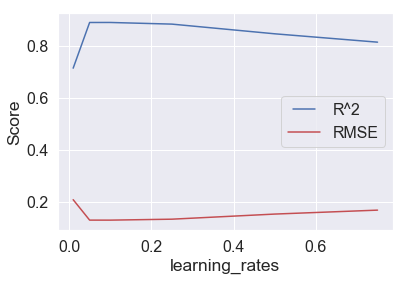

In [ ]:
learning_rates = [0.75 ,0.5, 0.25, 0.1, 0.05, 0.01]

r2_results = []
rmse_results = []

for eta in learning_rates:
    model = ensemble.GradientBoostingRegressor(learning_rate=eta)
    model.fit(X_training, y_training)
    y_pred = model.predict(X_valid)
    r2_clf = r2_score(y_valid, y_pred)
    rmse_clf = np.sqrt(mean_squared_error(y_valid, y_pred))
    r2_results.append(r2_clf)
    rmse_results.append(rmse_clf)
    
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(learning_rates, r2_results, 'b', label='R^2')
line2, = plt.plot(learning_rates, rmse_results, 'r', label='RMSE')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('Score')
plt.xlabel('learning_rates')
plt.show()

We see that using a high learning rate results in overfitting. For this data, a learning rate of 0.05 is optimal.

## N_estimators
N_estimators represents the number of trees in the forest. Usually the higher the number of trees the better to learn the data.

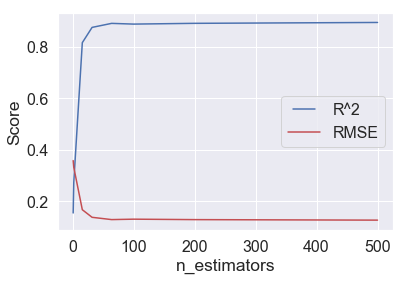

In [ ]:
n_estimators = [1, 2, 16, 32, 64, 100, 200, 500]
r2_results = []
rmse_results = []

for estimator in n_estimators:
    model = ensemble.GradientBoostingRegressor(n_estimators=estimator)
    model.fit(X_training, y_training)
    y_pred = model.predict(X_valid)
    r2_clf = r2_score(y_valid, y_pred)
    rmse_clf = np.sqrt(mean_squared_error(y_valid, y_pred))
    r2_results.append(r2_clf)
    rmse_results.append(rmse_clf)
    
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(n_estimators, r2_results, 'b', label='R^2')
line2, = plt.plot(n_estimators, rmse_results, 'r', label='RMSE')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('Score')
plt.xlabel('n_estimators')
plt.show()

In our case, using more than 100 trees is good for our model.

## Max_depth
This indicates how deep the built tree can be. The deeper the tree, the more splits it has and it captures more information about how the data. 

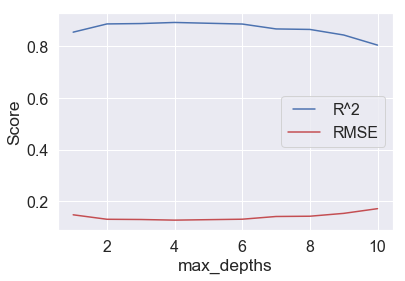

In [ ]:
max_depths = np.linspace(1, 10, 10, endpoint=True)
r2_results = []
rmse_results = []

for max_depth in max_depths:
    model = ensemble.GradientBoostingRegressor(max_depth=max_depth)
    model.fit(X_training, y_training)
    y_pred = model.predict(X_valid)
    r2_clf = r2_score(y_valid, y_pred)
    rmse_clf = np.sqrt(mean_squared_error(y_valid, y_pred))
    r2_results.append(r2_clf)
    rmse_results.append(rmse_clf)
    
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_depths, r2_results, 'b', label='R^2')
line2, = plt.plot(max_depths, rmse_results, 'r', label='RMSE')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('Score')
plt.xlabel('max_depths')
plt.show()

Based on the plots above, we will choose a max_depth = 5.

## Min_samples_split
min_samples_split represents the minimum number of samples required to split an internal node. This can vary between considering at least one sample at each node to considering all of the samples at each node. When we increase this parameter, the tree becomes more constrained as it has to consider more samples at each node.

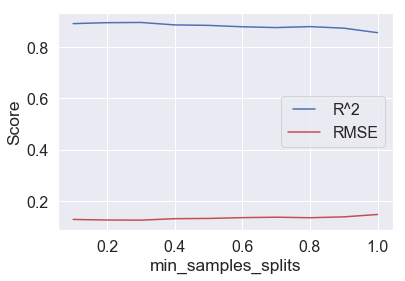

In [ ]:
min_samples_splits = np.linspace(0.1, 1.0, 10, endpoint=True)
r2_results = []
rmse_results = []

for min_samples_split in min_samples_splits:
    model = ensemble.GradientBoostingRegressor(min_samples_split=min_samples_split)
    model.fit(X_training, y_training)
    y_pred = model.predict(X_valid)
    r2_clf = r2_score(y_valid, y_pred)
    rmse_clf = np.sqrt(mean_squared_error(y_valid, y_pred))
    r2_results.append(r2_clf)
    rmse_results.append(rmse_clf)
    
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(min_samples_splits, r2_results, 'b', label='R^2')
line2, = plt.plot(min_samples_splits, rmse_results, 'r', label='RMSE')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('Score')
plt.xlabel('min_samples_splits')
plt.show()

So we will choose min_samples_splits = 0.28

## Min_samples_leaf
The minimum number of samples required to be at a leaf node. 

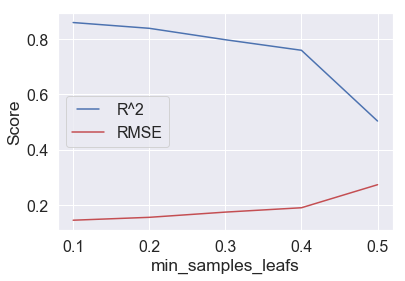

In [ ]:
min_samples_leafs = np.linspace(0.1, 0.5, 5, endpoint=True)
r2_results = []
rmse_results = []

for min_samples_leaf in min_samples_leafs:
    model = ensemble.GradientBoostingRegressor(min_samples_leaf=min_samples_leaf)
    model.fit(X_training, y_training)
    y_pred = model.predict(X_valid)
    r2_clf = r2_score(y_valid, y_pred)
    rmse_clf = np.sqrt(mean_squared_error(y_valid, y_pred))
    r2_results.append(r2_clf)
    rmse_results.append(rmse_clf)
    
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(min_samples_leafs, r2_results, 'b', label='R^2')
line2, = plt.plot(min_samples_leafs, rmse_results, 'r', label='RMSE')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('Score')
plt.xlabel('min_samples_leafs')
plt.show()

 Increasing this value can cause underfitting.

## Max_features
max_features represents the number of features to consider when looking for the best split.

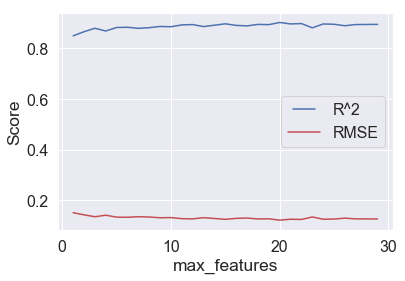

In [ ]:
max_features = list(range(1,30))
r2_results = []
rmse_results = []

for max_feature in max_features:
    model = ensemble.GradientBoostingRegressor(max_features=max_feature)
    model.fit(X_training, y_training)
    y_pred = model.predict(X_valid)
    r2_clf = r2_score(y_valid, y_pred)
    rmse_clf = np.sqrt(mean_squared_error(y_valid, y_pred))
    r2_results.append(r2_clf)
    rmse_results.append(rmse_clf)
    
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_features, r2_results, 'b', label='R^2')
line2, = plt.plot(max_features, rmse_results, 'r', label='RMSE')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('Score')
plt.xlabel('max_features')
plt.show()

<a id="p9"></a>
# 9. Blending + Submission

In [ ]:
def blend_models_predict(X):
    return ((0.05 * lm.predict(X)) + \
            (0.05 * linreg.predict(X)) + \
            (0.05 * ridge.predict(X)) + \
            (0.1 * clf.predict(X)) + \
            (0.2 * gbm.predict(X)) + \
            (0.15 * rfr.predict(X)) + \
            (0.4 * xgb.predict(X)))


In [ ]:
submission_predictions = np.exp(blend_models_predict(df_test_add))
print(submission_predictions)

[118637.75315517 159775.84831005 181256.41244666 ... 159721.69528434
 111364.30821825 208095.26991177]


In [ ]:
res=pd.DataFrame(columns = ['Id', 'SalePrice'])
res['Id'] = df_test.index + 1461
res['SalePrice'] = submission_predictions
res.to_csv('submission1.csv',index=False)

NameError: name 'submission_predictions' is not defined

## Best Score : 0.11777

## Leaderboard Rank : 775